## ⚙️ **Libraries Import**

In [11]:
# Set seed for reproducibility
SEED = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(SEED)
random.seed(SEED)

# Import PyTorch
import torch
torch.manual_seed(SEED)

if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.benchmark = True
else:
    device = torch.device("cpu")

print(f"PyTorch version: {torch.__version__}")
print(f"Device: {device}")

# Import other libraries
import pandas as pd

PyTorch version: 2.8.0+cpu
Device: cpu


## ⏳ **Data Loading**

In [12]:
df_train = pd.read_csv("pirate_pain_train.csv")
df_test = pd.read_csv("pirate_pain_test.csv")
df_train.head()

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30
0,0,0,2,0,2,1,two,two,two,1.094705,...,3.499558e-06,1.945042e-06,0.000004,1.153299e-05,0.000004,0.017592,0.013508,0.026798,0.027815,0.5
1,0,1,2,2,2,2,two,two,two,1.135183,...,3.976952e-07,6.765107e-07,0.000006,4.643774e-08,0.000000,0.013352,0.000000,0.013377,0.013716,0.5
2,0,2,2,0,2,2,two,two,two,1.080745,...,1.533820e-07,1.698525e-07,0.000001,2.424536e-06,0.000003,0.016225,0.008110,0.024097,0.023105,0.5
3,0,3,2,2,2,2,two,two,two,0.938017,...,1.006865e-05,5.511079e-07,0.000002,5.432416e-08,0.000000,0.011832,0.007450,0.028613,0.024648,0.5
4,0,4,2,2,2,2,two,two,two,1.090185,...,4.437266e-06,1.735459e-07,0.000002,5.825366e-08,0.000007,0.005360,0.002532,0.033026,0.025328,0.5


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105760 entries, 0 to 105759
Data columns (total 40 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sample_index   105760 non-null  int64  
 1   time           105760 non-null  int64  
 2   pain_survey_1  105760 non-null  int64  
 3   pain_survey_2  105760 non-null  int64  
 4   pain_survey_3  105760 non-null  int64  
 5   pain_survey_4  105760 non-null  int64  
 6   n_legs         105760 non-null  object 
 7   n_hands        105760 non-null  object 
 8   n_eyes         105760 non-null  object 
 9   joint_00       105760 non-null  float64
 10  joint_01       105760 non-null  float64
 11  joint_02       105760 non-null  float64
 12  joint_03       105760 non-null  float64
 13  joint_04       105760 non-null  float64
 14  joint_05       105760 non-null  float64
 15  joint_06       105760 non-null  float64
 16  joint_07       105760 non-null  float64
 17  joint_08       105760 non-nul

In [14]:
train_labels = pd.read_csv("pirate_pain_train_labels.csv")
train_labels.head()

,sample_index,label
0,0,no_pain
1,1,no_pain
2,2,low_pain
3,3,no_pain
4,4,no_pain


In [15]:
pain_survey_cols = ['pain_survey_1', 'pain_survey_2', 'pain_survey_3', 'pain_survey_4']
joint_cols = [f'joint_{str(i).zfill(2)}' for i in range(1, 31)]
body_cols = ['n_legs', 'n_eyes', 'n_hands']

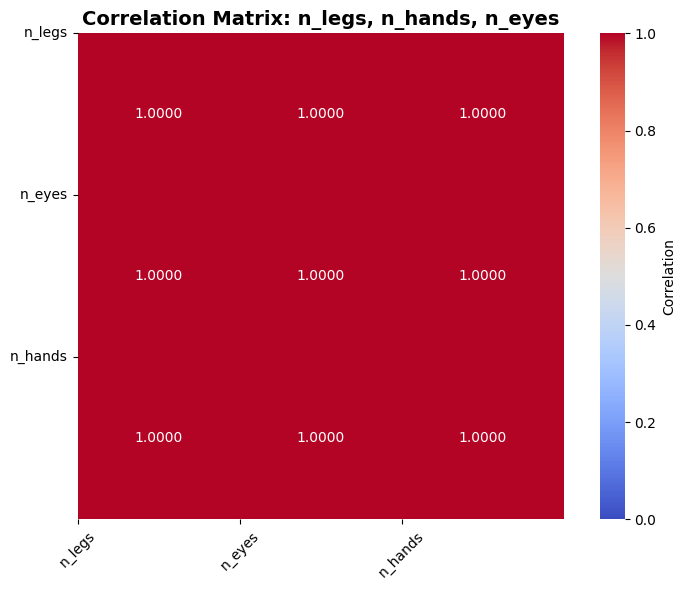

Correlation Matrix:
         n_legs  n_eyes  n_hands
n_legs      1.0     1.0      1.0
n_eyes      1.0     1.0      1.0
n_hands     1.0     1.0      1.0


In [16]:
# Check correlation between n_legs, n_hands, n_eyes
import matplotlib.pyplot as plt
import seaborn as sns

# Create encoded versions for correlation analysis
for col in body_cols:
    df_train[f'{col}_encoded'] = (df_train[col] == 'two').astype(int)
    df_test[f'{col}_encoded'] = (df_test[col] == 'two').astype(int)

# Calculate correlation matrix
correlation_features = [f'{col}_encoded' for col in body_cols]
corr_matrix = df_train[correlation_features].corr()

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.4f', cmap='coolwarm', 
            square=True, vmin=0, vmax=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix: n_legs, n_hands, n_eyes', fontsize=14, fontweight='bold')
plt.xticks(range(3), body_cols, rotation=45)
plt.yticks(range(3), body_cols, rotation=0)
plt.tight_layout()
plt.show()

# Print correlation values
print("Correlation Matrix:")
print("=" * 50)
corr_matrix.index = body_cols
corr_matrix.columns = body_cols
print(corr_matrix)

### Result: Perfect correlation (1.0) detected!
These three features are 100% redundant.

In [17]:
# Verify that all three features always have the same value
print("Verifying redundancy...")
print("=" * 60)

# Show unique combinations
print("Unique combinations in the data:")
print("=" * 60)
unique_combos = df_train[body_cols].drop_duplicates()
for idx, row in unique_combos.iterrows():
    count = ((df_train['n_legs'] == row['n_legs']) & 
             (df_train['n_hands'] == row['n_hands']) & 
             (df_train['n_eyes'] == row['n_eyes'])).sum()
    print(f"  {row['n_legs']:15s} | {row['n_hands']:15s} | {row['n_eyes']:15s} → {count:,} samples")

print("\nConclusion: Only 2 combinations exist (all natural OR all prosthetic) → Safe to consolidate into a single binary feature!")

Verifying redundancy...
Unique combinations in the data:
  two             | two             | two             → 104,800 samples
  one+peg_leg     | one+hook_hand   | one+eye_patch   → 960 samples

Conclusion: Only 2 combinations exist (all natural OR all prosthetic) → Safe to consolidate into a single binary feature!


In [18]:
# Create binary 'has_prosthetics' feature (0 = all natural, 1 = has prosthetics)
print("Creating consolidated feature: 'has_prosthetics'")
print("=" * 60)

# Create the new feature
df_train['has_prosthetics'] = (df_train['n_legs'] != 'two').astype(int)
df_test['has_prosthetics'] = (df_test['n_legs'] != 'two').astype(int)

# Show the mapping
print("\nMapping:")
print("  has_prosthetics = 0 → All natural body parts (two legs, two hands, two eyes)")
print("  has_prosthetics = 1 → Has prosthetics (peg leg, hook hand, eye patch)")

# Show distribution
print("\n" + "=" * 60)
print("Distribution of new feature:")
print("=" * 60)
print("\nTraining set:")
train_dist = df_train['has_prosthetics'].value_counts().sort_index()
for value, count in train_dist.items():
    label = "Natural" if value == 0 else "Prosthetics"
    pct = (count / len(df_train)) * 100
    print(f"  {value} ({label:12s}): {count:6,} samples ({pct:.2f}%)")

print("\nTest set:")
test_dist = df_test['has_prosthetics'].value_counts().sort_index()
for value, count in test_dist.items():
    label = "Natural" if value == 0 else "Prosthetics"
    pct = (count / len(df_test)) * 100
    print(f"  {value} ({label:12s}): {count:6,} samples ({pct:.2f}%)")


# Columns to drop
cols_to_drop = body_cols + correlation_features

# Drop from both train and test
df_train = df_train.drop(columns=[col for col in cols_to_drop if col in df_train.columns])
df_test = df_test.drop(columns=[col for col in cols_to_drop if col in df_test.columns])

print("\nFeature created successfully!")

Creating consolidated feature: 'has_prosthetics'

Mapping:
  has_prosthetics = 0 → All natural body parts (two legs, two hands, two eyes)
  has_prosthetics = 1 → Has prosthetics (peg leg, hook hand, eye patch)

Distribution of new feature:

Training set:
  0 (Natural     ): 104,800 samples (99.09%)
  1 (Prosthetics ):    960 samples (0.91%)

Test set:
  0 (Natural     ): 209,760 samples (99.02%)
  1 (Prosthetics ):  2,080 samples (0.98%)

Feature created successfully!


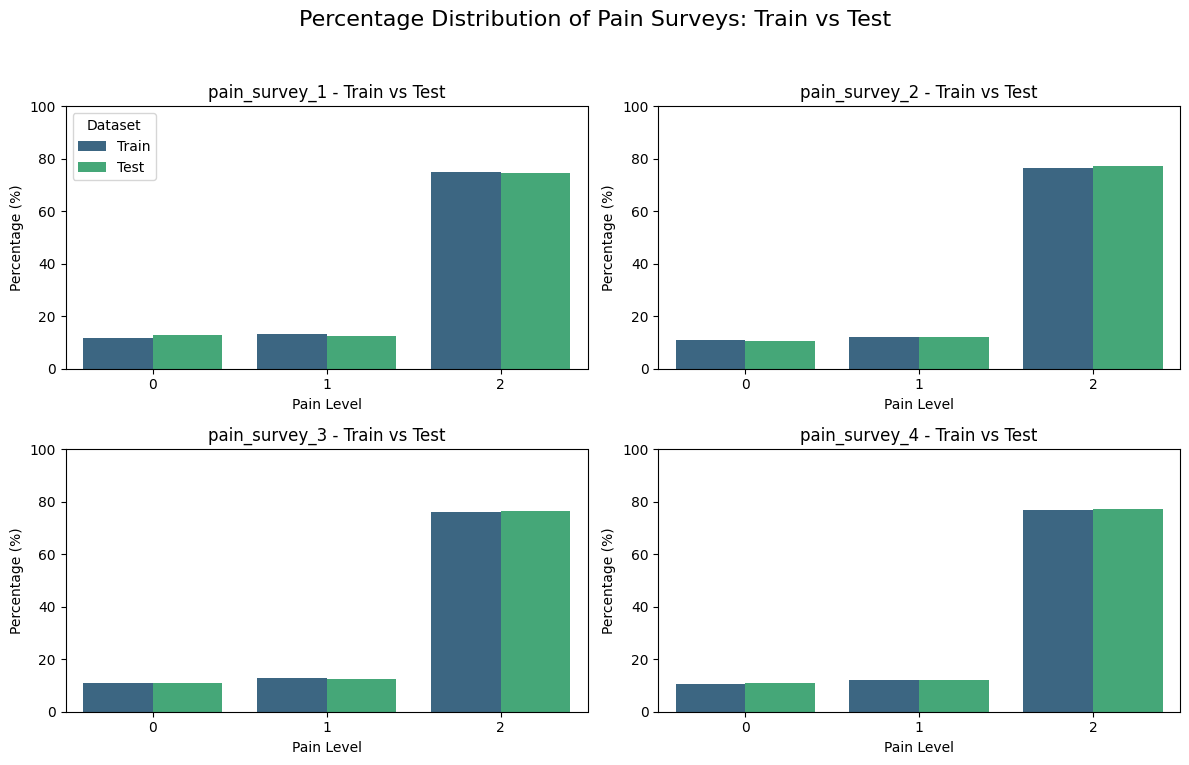

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(pain_survey_cols):
    ax = axes[i]

    # percentages
    train_pct = df_train[col].value_counts(normalize=True).mul(100)
    test_pct = df_test[col].value_counts(normalize=True).mul(100)

    # ensure same levels and sorted order
    levels = sorted(set(train_pct.index).union(set(test_pct.index)))
    train_pct = train_pct.reindex(levels, fill_value=0)
    test_pct = test_pct.reindex(levels, fill_value=0)

    # prepare long dataframe for seaborn
    plot_df = pd.DataFrame({
        'Pain Level': levels,
        'Train': train_pct.values,
        'Test': test_pct.values
    }).melt(id_vars='Pain Level', var_name='Dataset', value_name='percentage')

    sns.barplot(x='Pain Level', y='percentage', hue='Dataset', data=plot_df, ax=ax, palette='viridis')
    ax.set_title(f'{col} - Train vs Test')
    ax.set_xlabel('Pain Level')
    ax.set_ylabel('Percentage (%)')
    ax.set_ylim(0, 100)

    # keep legend only on the first subplot
    try:
        if i == 0:
            ax.legend(title='Dataset')
        else:
            ax.get_legend().remove()
    except Exception:
        pass

fig.suptitle('Percentage Distribution of Pain Surveys: Train vs Test', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

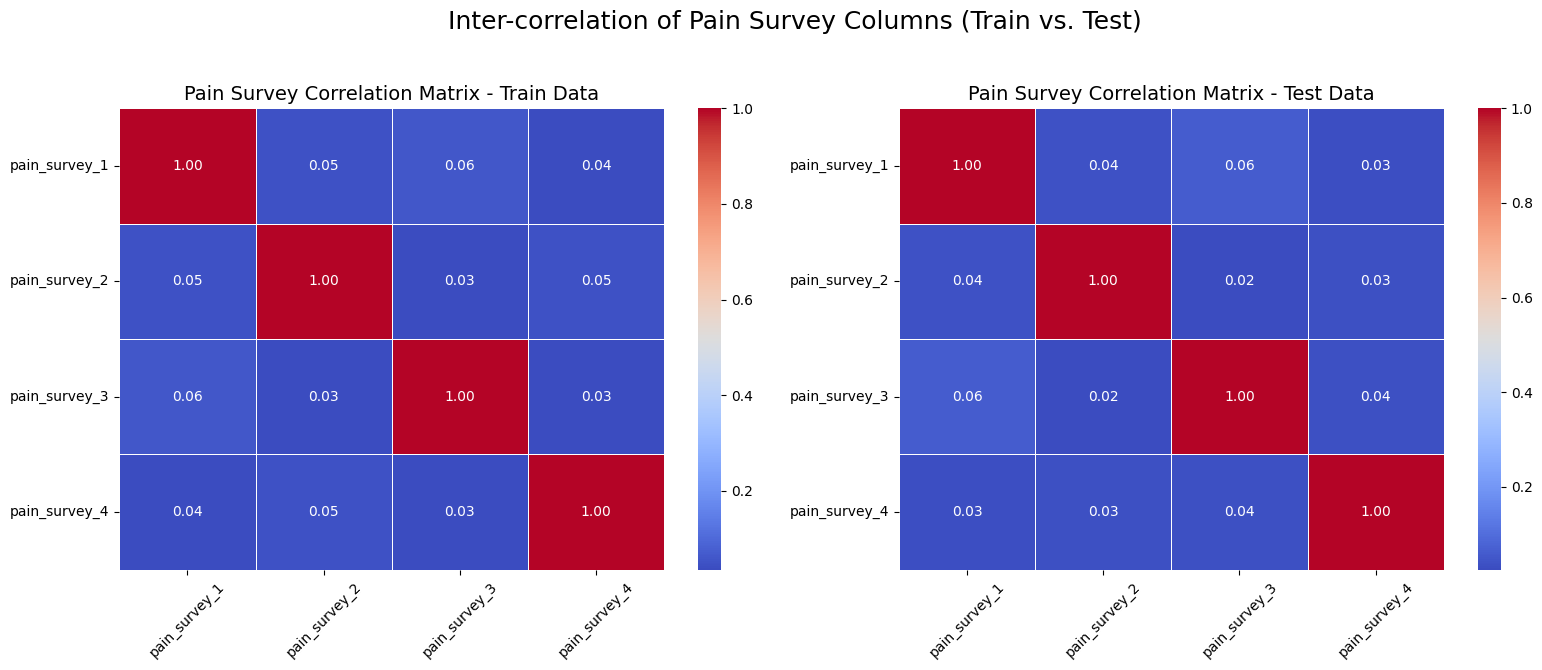

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate the Pearson correlation matrix for the pain_survey_cols in df_train
corr_matrix_train = df_train[pain_survey_cols].corr(method='pearson')

# 2. Calculate the Pearson correlation matrix for the pain_survey_cols in df_test
corr_matrix_test = df_test[pain_survey_cols].corr(method='pearson')

# 3. Create a figure with two subplots for heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Inter-correlation of Pain Survey Columns (Train vs. Test)', fontsize=18)

# Heatmap for Training Data
sns.heatmap(corr_matrix_train, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[0])
axes[0].set_title('Pain Survey Correlation Matrix - Train Data', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)

# Heatmap for Testing Data
sns.heatmap(corr_matrix_test, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[1])
axes[1].set_title('Pain Survey Correlation Matrix - Test Data', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)

# Adjust the layout to prevent overlapping titles and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle
plt.show()

In [25]:
from scipy.stats import f_oneway

df_train_merged = pd.merge(df_train, train_labels, on='sample_index', how='left')

print("Performing ANOVA for each pain_survey column against 'label' in df_train_merged:")
for pain_col in pain_survey_cols:
    print(f"\n--- ANOVA for {pain_col} vs. label ---")
    # Get unique labels
    labels = df_train_merged['label'].unique()

    # Prepare data for ANOVA: a list of arrays, each array containing pain_col values for a specific label
    data_for_anova = [df_train_merged[pain_col][df_train_merged['label'] == label].values for label in labels]

    # Perform ANOVA test
    f_statistic, p_value = f_oneway(*data_for_anova)

    print(f"F-statistic: {f_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Interpret the p-value
    alpha = 0.05
    if p_value < alpha:
        print(f"Conclusion: Since p-value ({p_value:.4f}) < alpha ({alpha}), we reject the null hypothesis. There is a statistically significant difference in {pain_col} means across different pain labels.")
    else:
        print(f"Conclusion: Since p-value ({p_value:.4f}) >= alpha ({alpha}), we fail to reject the null hypothesis. There is no statistically significant difference in {pain_col} means across different pain labels.")

Performing ANOVA for each pain_survey column against 'label' in df_train_merged:

--- ANOVA for pain_survey_1 vs. label ---
F-statistic: 920.7073
P-value: 0.0000
Conclusion: Since p-value (0.0000) < alpha (0.05), we reject the null hypothesis. There is a statistically significant difference in pain_survey_1 means across different pain labels.

--- ANOVA for pain_survey_2 vs. label ---
F-statistic: 614.2791
P-value: 0.0000
Conclusion: Since p-value (0.0000) < alpha (0.05), we reject the null hypothesis. There is a statistically significant difference in pain_survey_2 means across different pain labels.

--- ANOVA for pain_survey_3 vs. label ---
F-statistic: 330.4434
P-value: 0.0000
Conclusion: Since p-value (0.0000) < alpha (0.05), we reject the null hypothesis. There is a statistically significant difference in pain_survey_3 means across different pain labels.

--- ANOVA for pain_survey_4 vs. label ---
F-statistic: 240.1594
P-value: 0.0000
Conclusion: Since p-value (0.0000) < alpha (0.

In [26]:
unique_labels = df_train_merged['label'].unique()
print(f"Unique pain labels: {unique_labels}")
pain_label_mapping = {
    'no_pain': 0,
    'low_pain': 1,
    'high_pain': 2
}
df_train_merged['pain_level'] = df_train_merged['label'].map(pain_label_mapping)
df_train_merged.head()

Unique pain labels: ['no_pain' 'low_pain' 'high_pain']


,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,joint_00,joint_01,joint_02,joint_03,...,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30,has_prosthetics,label,pain_level
0,0,0,2,0,2,1,1.094705,0.985281,1.018302,1.010385,...,1.153299e-05,0.000004,0.017592,0.013508,0.026798,0.027815,0.5,0,no_pain,0
1,0,1,2,2,2,2,1.135183,1.021175,0.994343,1.052364,...,4.643774e-08,0.000000,0.013352,0.000000,0.013377,0.013716,0.5,0,no_pain,0
2,0,2,2,0,2,2,1.080745,0.962842,1.009588,0.977169,...,2.424536e-06,0.000003,0.016225,0.008110,0.024097,0.023105,0.5,0,no_pain,0
3,0,3,2,2,2,2,0.938017,1.081592,0.998021,0.987283,...,5.432416e-08,0.000000,0.011832,0.007450,0.028613,0.024648,0.5,0,no_pain,0
4,0,4,2,2,2,2,1.090185,1.032145,1.008710,0.963658,...,5.825366e-08,0.000007,0.005360,0.002532,0.033026,0.025328,0.5,0,no_pain,0


In [27]:
from scipy.stats import f_oneway

anova_results = {}

for col in joint_cols:
    # Group data by pain level
    group0 = df_train_merged[df_train_merged['pain_level'] == 0][col]
    group1 = df_train_merged[df_train_merged['pain_level'] == 1][col]
    group2 = df_train_merged[df_train_merged['pain_level'] == 2][col]

    # Perform ANOVA test
    # Ensure all groups have data to avoid errors
    if len(group0) > 1 and len(group1) > 1 and len(group2) > 1:
        f_statistic, p_value = f_oneway(group0, group1, group2)
        anova_results[col] = p_value
    else:
        anova_results[col] = float('nan') # Assign NaN if a group is too small for ANOVA

# Sort results by p-value for easier interpretation
sorted_anova_results = sorted(anova_results.items(), key=lambda x: x[1])

print("ANOVA p-values for joint columns (sorted by significance):")
for col, p_val in sorted_anova_results:
    print(f"  {col}: {p_val:.4f}")

ANOVA p-values for joint columns (sorted by significance):
  joint_12: 0.0000
  joint_26: 0.0000
  joint_27: 0.0000
  joint_28: 0.0000
  joint_29: 0.0000
  joint_07: 0.0000
  joint_15: 0.0000
  joint_10: 0.0000
  joint_01: 0.0000
  joint_06: 0.0000
  joint_16: 0.0000
  joint_11: 0.0000
  joint_17: 0.0000
  joint_13: 0.0000
  joint_09: 0.0000
  joint_18: 0.0000
  joint_05: 0.0000
  joint_14: 0.0000
  joint_04: 0.0000
  joint_03: 0.0000
  joint_24: 0.0000
  joint_08: 0.0000
  joint_19: 0.0000
  joint_23: 0.0000
  joint_20: 0.0001
  joint_02: 0.0013
  joint_22: 0.0018
  joint_25: 0.0022
  joint_21: 0.0047
  joint_30: nan


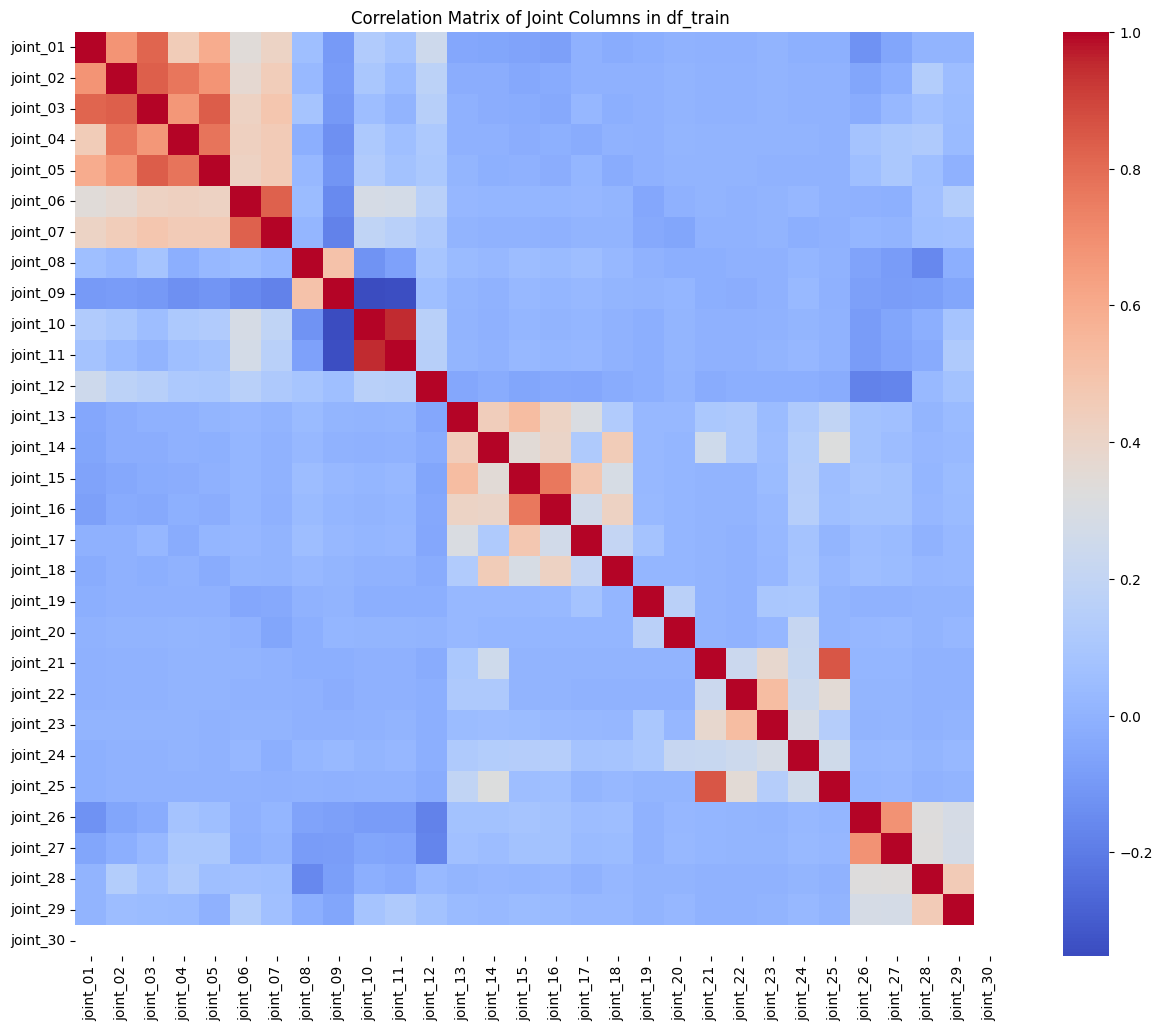

In [28]:
joint_data_train = df_train[joint_cols]
correlation_matrix_train = joint_data_train.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_train, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Joint Columns in df_train')
plt.show()

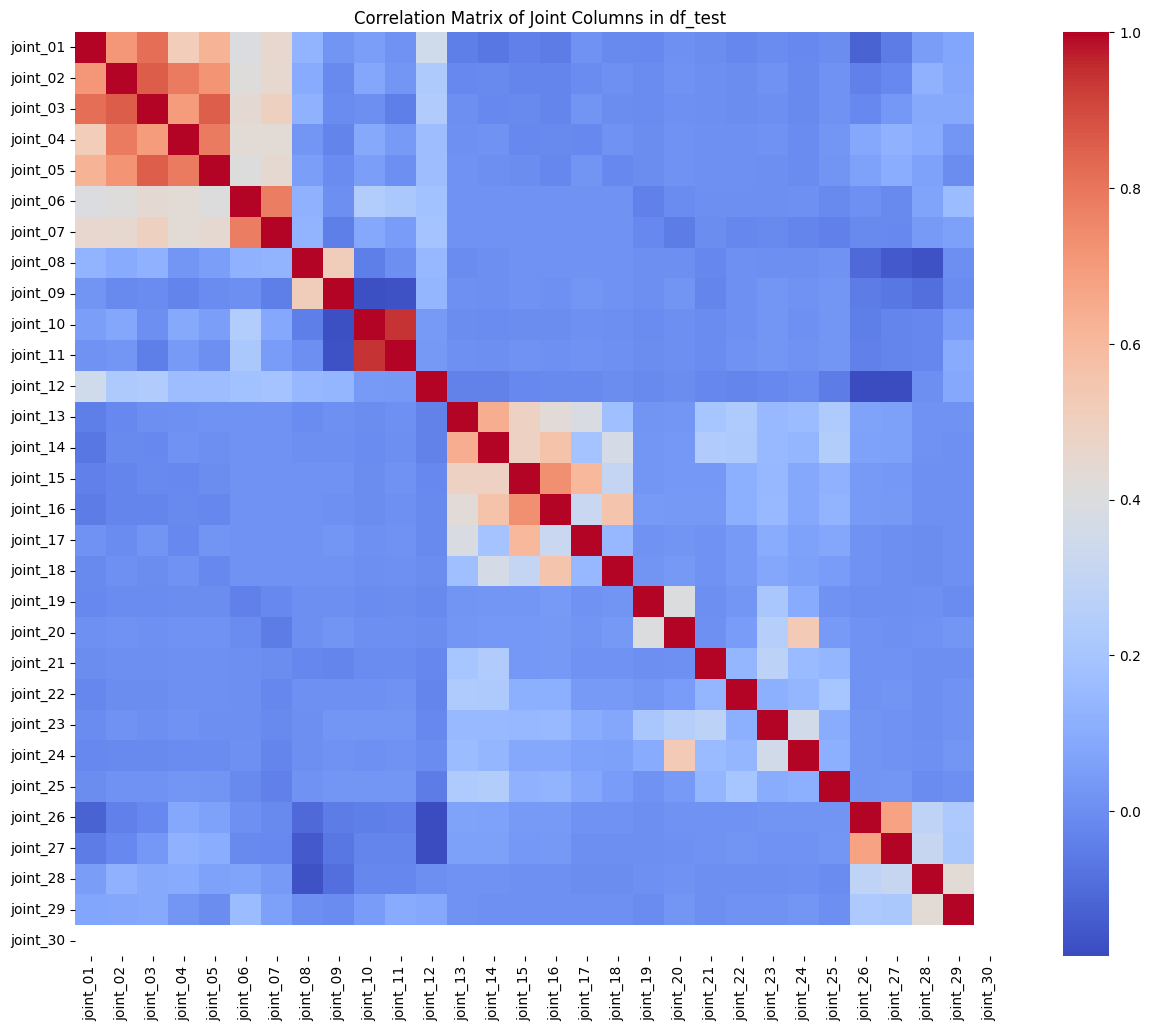

In [29]:
joint_data_test = df_test[joint_cols]
correlation_matrix_test = joint_data_test.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_test, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Joint Columns in df_test')
plt.show()